# Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

# Import Classifications DataSets

In [3]:
from sklearn.datasets import make_classification

# Data set with 2 features for Vsualization purposes

In [4]:
x, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42, n_classes=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Visualization

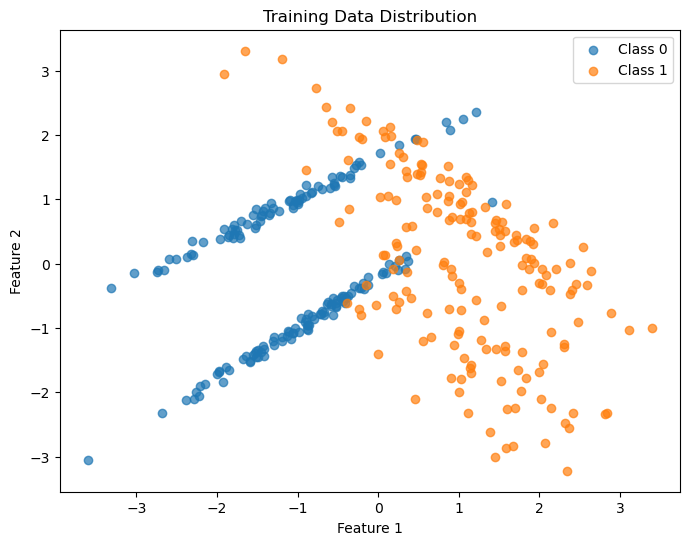

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label="Class 0", alpha=0.7)
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label="Class 1", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Data Distribution")
plt.legend()
plt.show()

# Train a Decision Tree Clasifier

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit max depth to prevent overfitting
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# Evaluate the model

In [7]:
y_pred = tree_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [8]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9133333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        78
           1       0.89      0.93      0.91        72

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150


Confusion Matrix:
 [[70  8]
 [ 5 67]]


# Visualize the model

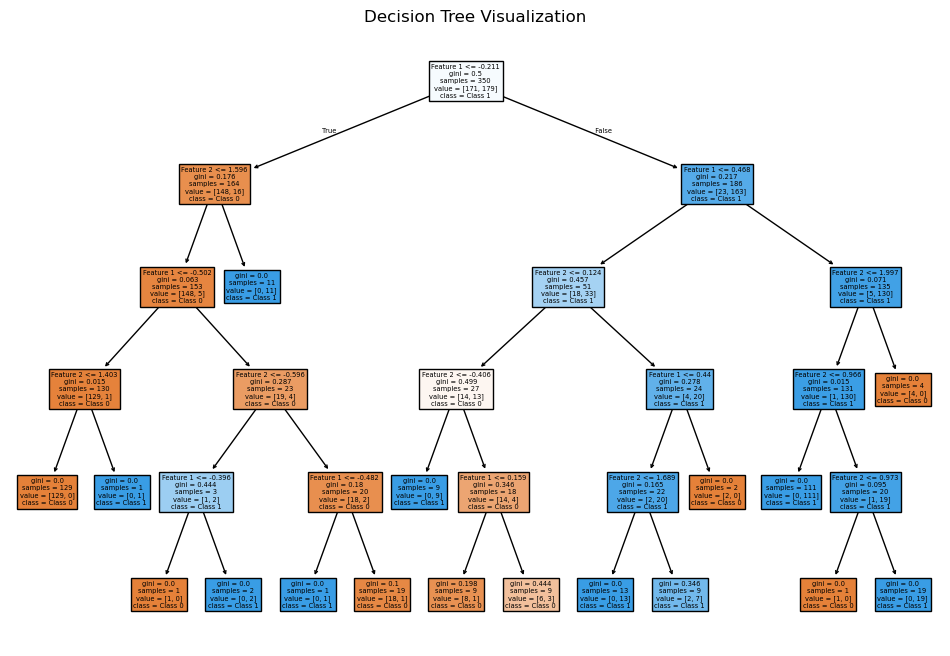

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Visualization")
plt.show()

# Ploting and tprinting the Model

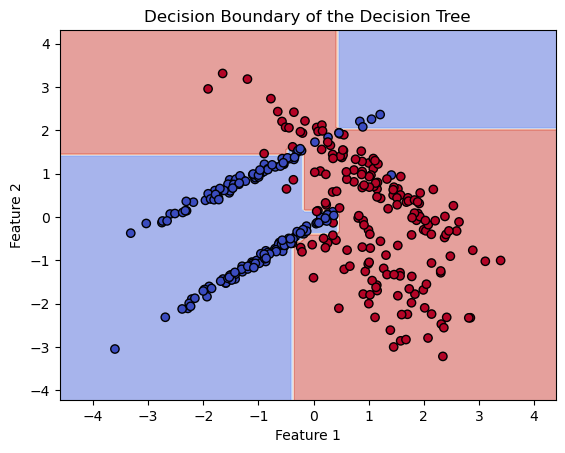

In [10]:
disp = DecisionBoundaryDisplay.from_estimator(tree_clf, x_train, response_method="predict", alpha=0.5, cmap="coolwarm")
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="k", cmap="coolwarm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of the Decision Tree")
plt.show()